In [1]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


In [6]:
def thetaphi_to_lonlat(ds):
    return ds.assign_coords({'longitude':(ds.phi-np.pi)*180/np.pi,'latitude':(np.pi/2-ds.theta)*180/np.pi}).swap_dims({'phi':'longitude','theta':'latitude'})


In [10]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24

# Without VMT

In [27]:
sol_novmt = xr.open_dataset('snapshots_novmt/snapshots_novmt_s1.h5',engine='dedalus')
sol_novmt = thetaphi_to_lonlat(sol_novmt)

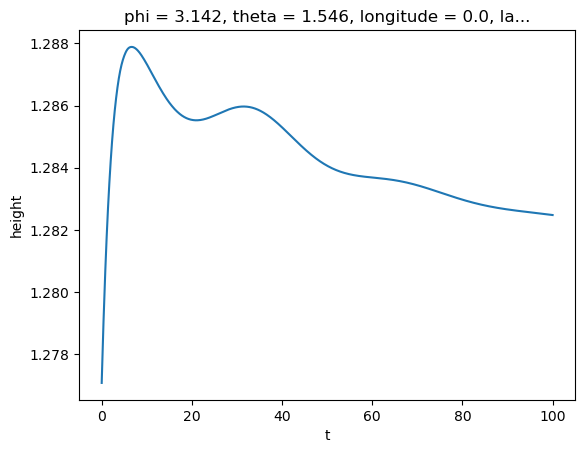

In [28]:
sol_novmt.height.sel(longitude=0.,latitude=0.,method='nearest').plot()

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


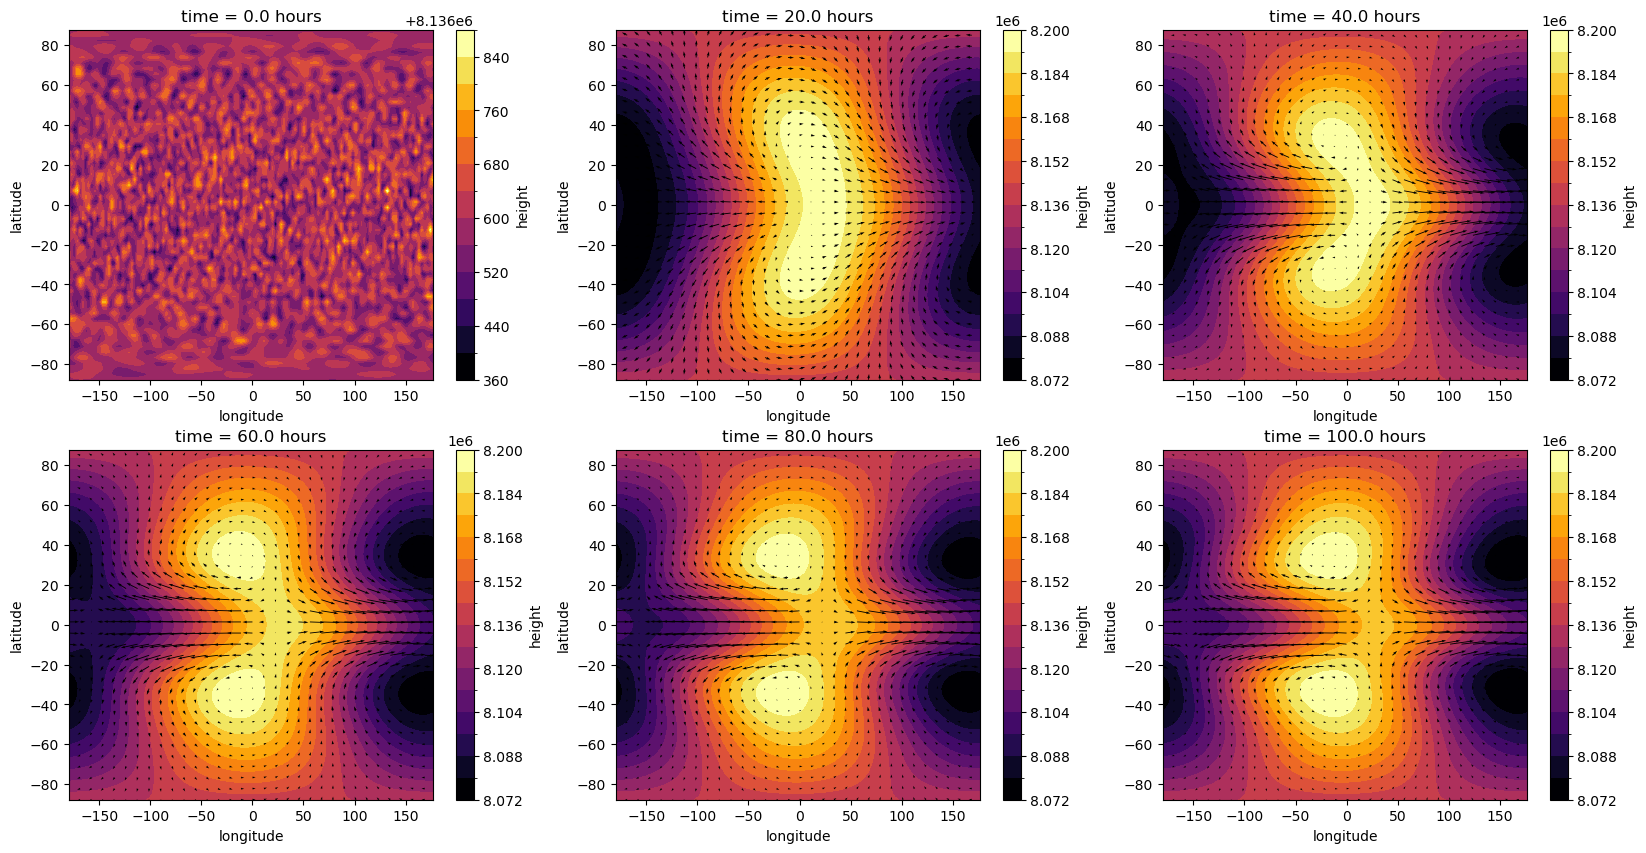

In [31]:
sol=sol_novmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.height[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u[time][::n,::m].T,
                  sol.v[time][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

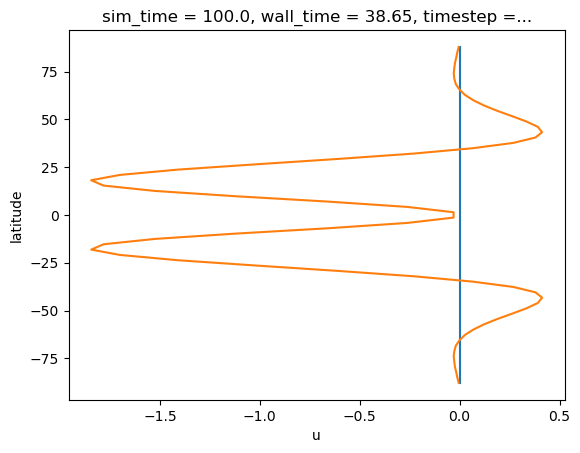

In [29]:
(sol_novmt.u.mean('longitude')[0]  /(meter/second)).plot(y='latitude')
(sol_novmt.u.mean('longitude')[-1] /(meter/second)).plot(y='latitude')

# With VMT

In [7]:
sol_vmt = xr.open_dataset('snapshots_vmt/snapshots_vmt_s1.h5',engine='dedalus')
sol_vmt = thetaphi_to_lonlat(sol_vmt)

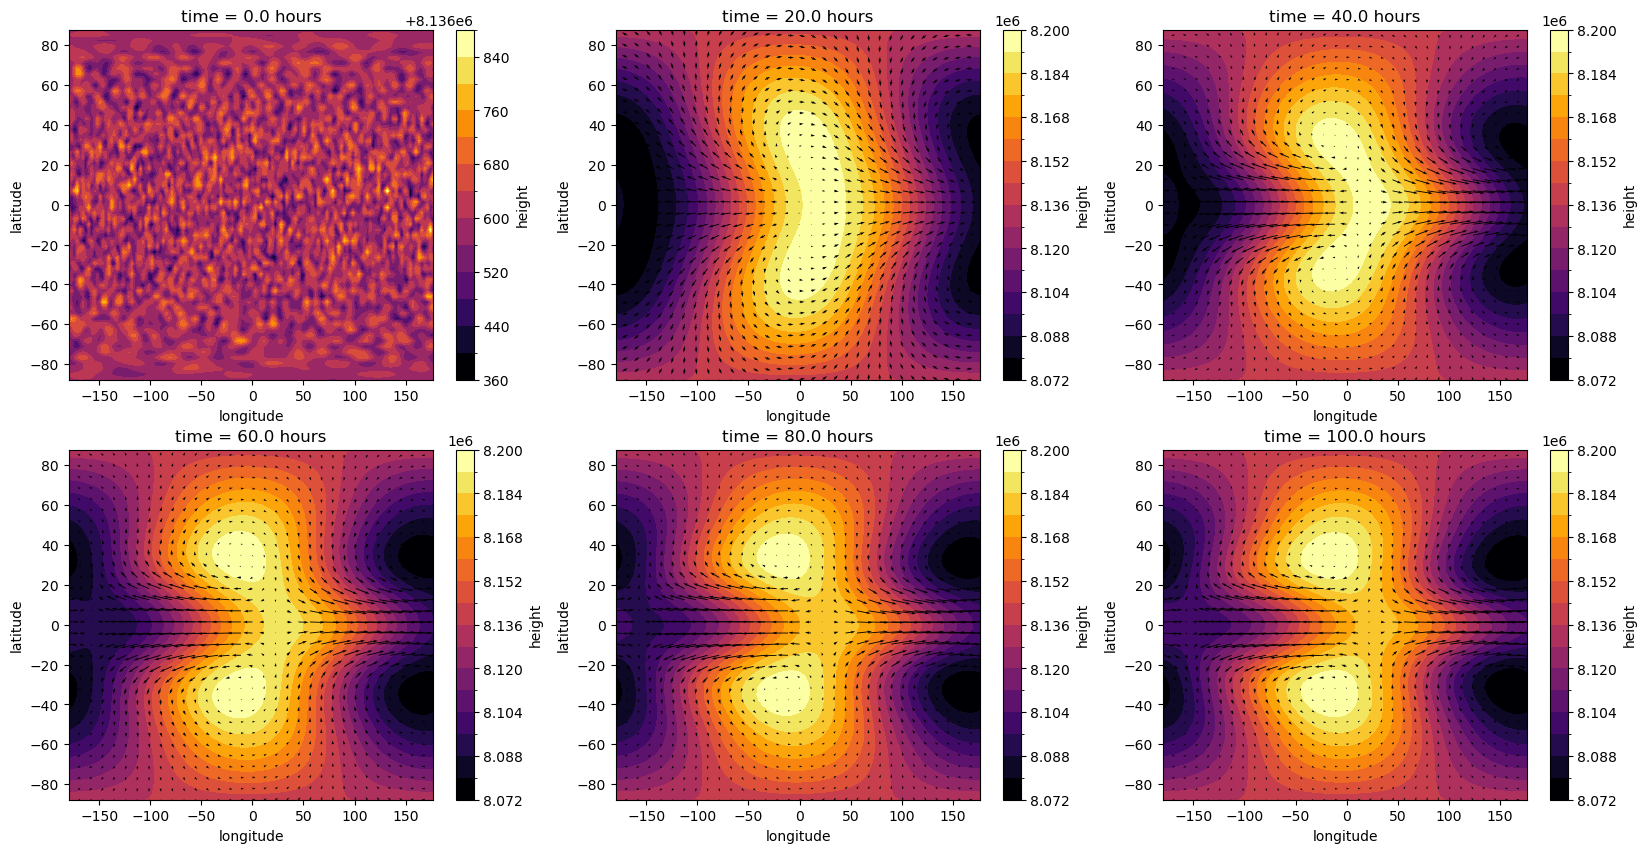

In [24]:
sol=sol_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.height[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u[time][::n,::m].T,
                  sol.v[time][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


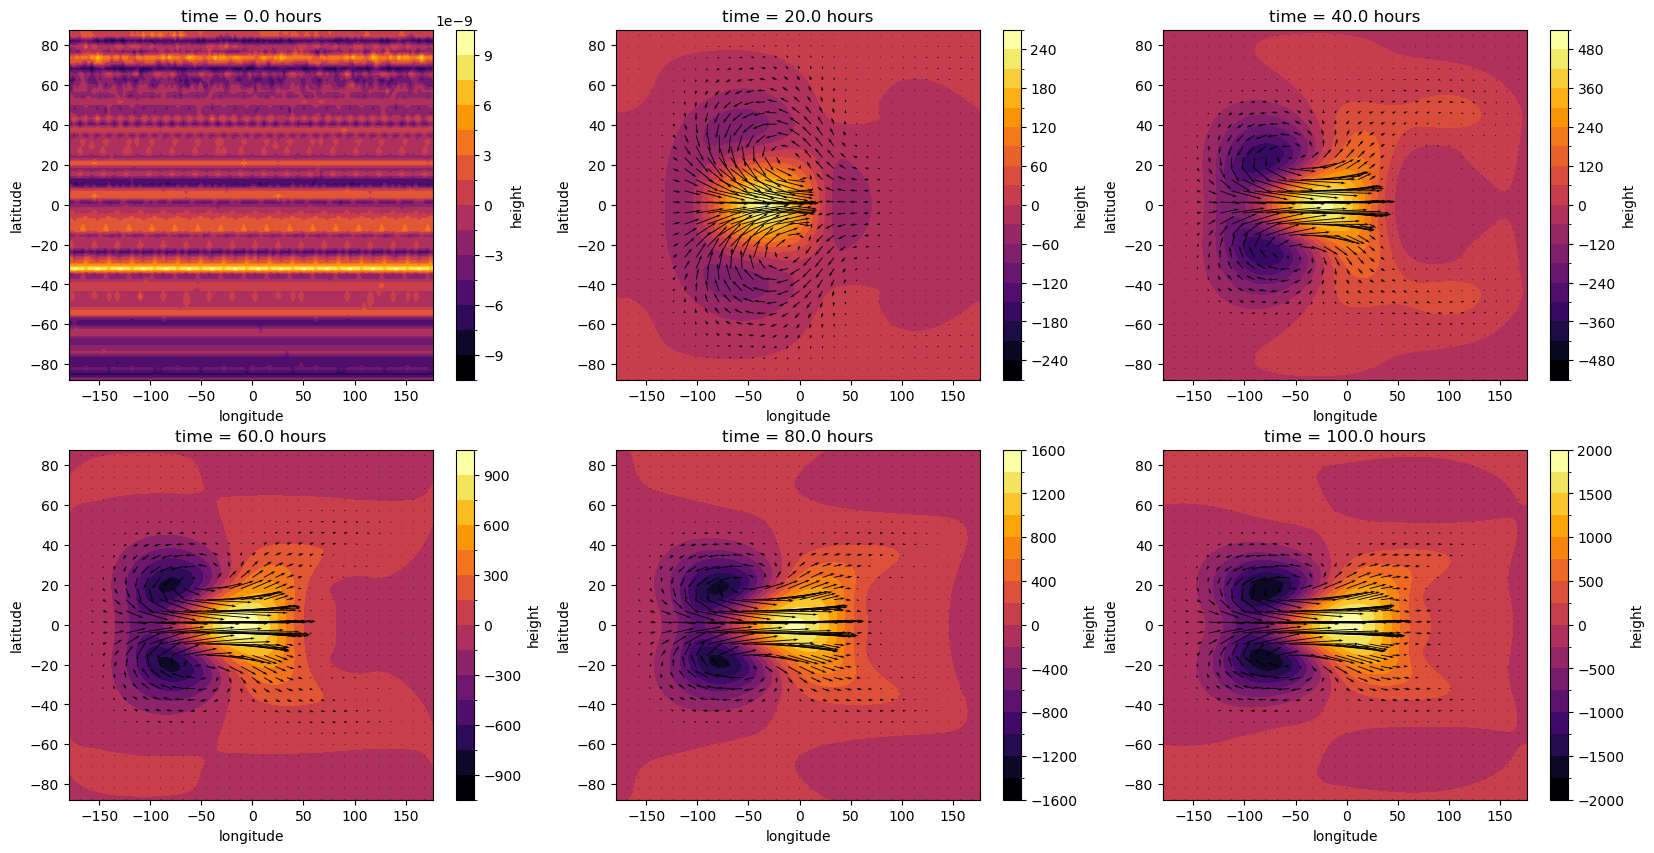

In [32]:
sol=sol_vmt-sol_novmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.height[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u[time][::n,::m].T,
                  sol.v[time][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

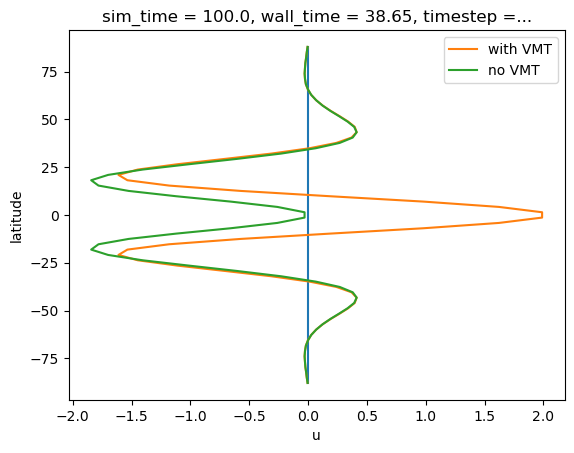

In [30]:
(sol_vmt.u.mean('longitude')[0]  /(meter/second)).plot(y='latitude')
(sol_vmt.u.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='with VMT')
(sol_novmt.u.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='no VMT')
plt.legend()